In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data ...')
(input_train,y_train),(input_test,y_test) = imdb.load_data(num_words = max_features)
print(len(input_train),'train sequences')
print(len(input_test),'test sequnces')

print('Pad sequences(samples x times)')
input_train = sequence.pad_sequences(input_train,maxlen = maxlen)
input_test = sequence.pad_sequences(input_test,maxlen= maxlen)
print('input_train shape:',input_train.shape)
print('input_test shape:',input_test.shape)

Loading data ...
25000 train sequences
25000 test sequnces
Pad sequences(samples x times)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [9]:
#用Embedding层和simpleRNN层来训练模型
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN
model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['acc'])
history = model.fit(input_train,y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)

C:\Users\tanling\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.5929 - acc: 0.6784 - val_loss: 0.5451 - val_acc: 0.7284
Epoch 2/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.3680 - acc: 0.8453 - val_loss: 0.3588 - val_acc: 0.8532
Epoch 3/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.2732 - acc: 0.8913 - val_loss: 0.3458 - val_acc: 0.8576
Epoch 4/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.2122 - acc: 0.9194 - val_loss: 0.4073 - val_acc: 0.8424
Epoch 5/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.1580 - acc: 0.9416 - val_loss: 0.4177 - val_acc: 0.8262
Epoch 6/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1110 - acc: 0.9620 - val_loss: 0.4576 - val_acc: 0.8436
Epoch 7/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.0721 - acc: 0.9773 - val_loss: 0.5074 - val_acc:

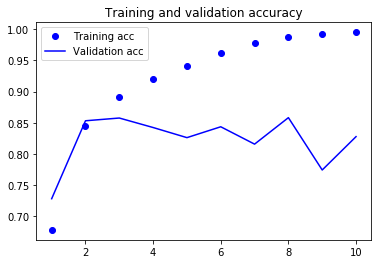

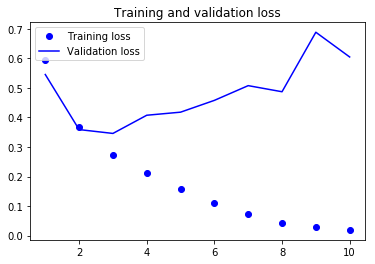

In [11]:
#绘制结果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc =  history.history['val_acc']
loss =  history.history['loss']
val_loss =  history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()